### This markdown scirpt is for testing the text of cmu arctic 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import os
import re
import random
import time
import traceback
from IPython.display import Image
import pickle
from sklearn.manifold import TSNE
import tensorflow as tf

/home/gyzhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [7]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
ckpt_path = "/home/gyzhang/merlin/egs/cmu_arctic/s1/experiments/cmu_arctic/acoustic_model/nnets_model/tensorflow/feed_forward_6_tanh/mymodel.ckpt-1108778"

In [8]:
print_tensors_in_checkpoint_file(ckpt_path, tensor_name="", all_tensors=True, all_tensor_names=True)

tensor_name:  Variable
1108778
tensor_name:  fully_connected/biases
[-0.30798805  0.25804442 -0.9358313  ... -0.04786061 -0.0153289
  0.47680575]
tensor_name:  fully_connected/weights
[[ 0.6986186   0.06278703 -0.30385968 ... -1.4668548  -0.01215845
  -0.33322367]
 [-0.76460785  0.26346248 -0.11384292 ... -0.11219762 -0.04770099
   0.6173182 ]
 [-0.10415936 -0.3927576  -0.15477453 ...  0.3159367   0.822443
   1.3244096 ]
 ...
 [ 2.091893   -0.8351591   1.8744192  ...  1.3189049   0.36819747
   0.62414086]
 [ 0.3485082   3.3792944  -0.9077245  ... -0.36698017 -0.6927936
   0.79938585]
 [-1.3388984   3.6480832   2.4311101  ...  0.2869981  -0.23734081
   0.04720094]]
tensor_name:  fully_connected_1/biases
[ 0.6329301   0.17385286  0.29707155 ... -0.26862139 -0.03907859
  0.0906208 ]
tensor_name:  fully_connected_1/weights
[[ 0.73209316 -0.37618586 -0.29110518 ... -0.10032864  0.63630384
  -1.526835  ]
 [ 1.6327695  -0.31887293  1.3372273  ...  0.29281268 -0.27438608
  -1.122769  ]
 [ 0.64

In [9]:
utt_emb = tf.contrib.framework.load_variable(ckpt_path, 'utt-embeddings')
X = np.array(utt_emb)

In [10]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [11]:
color = ['b', 'g', 'r', 'c']

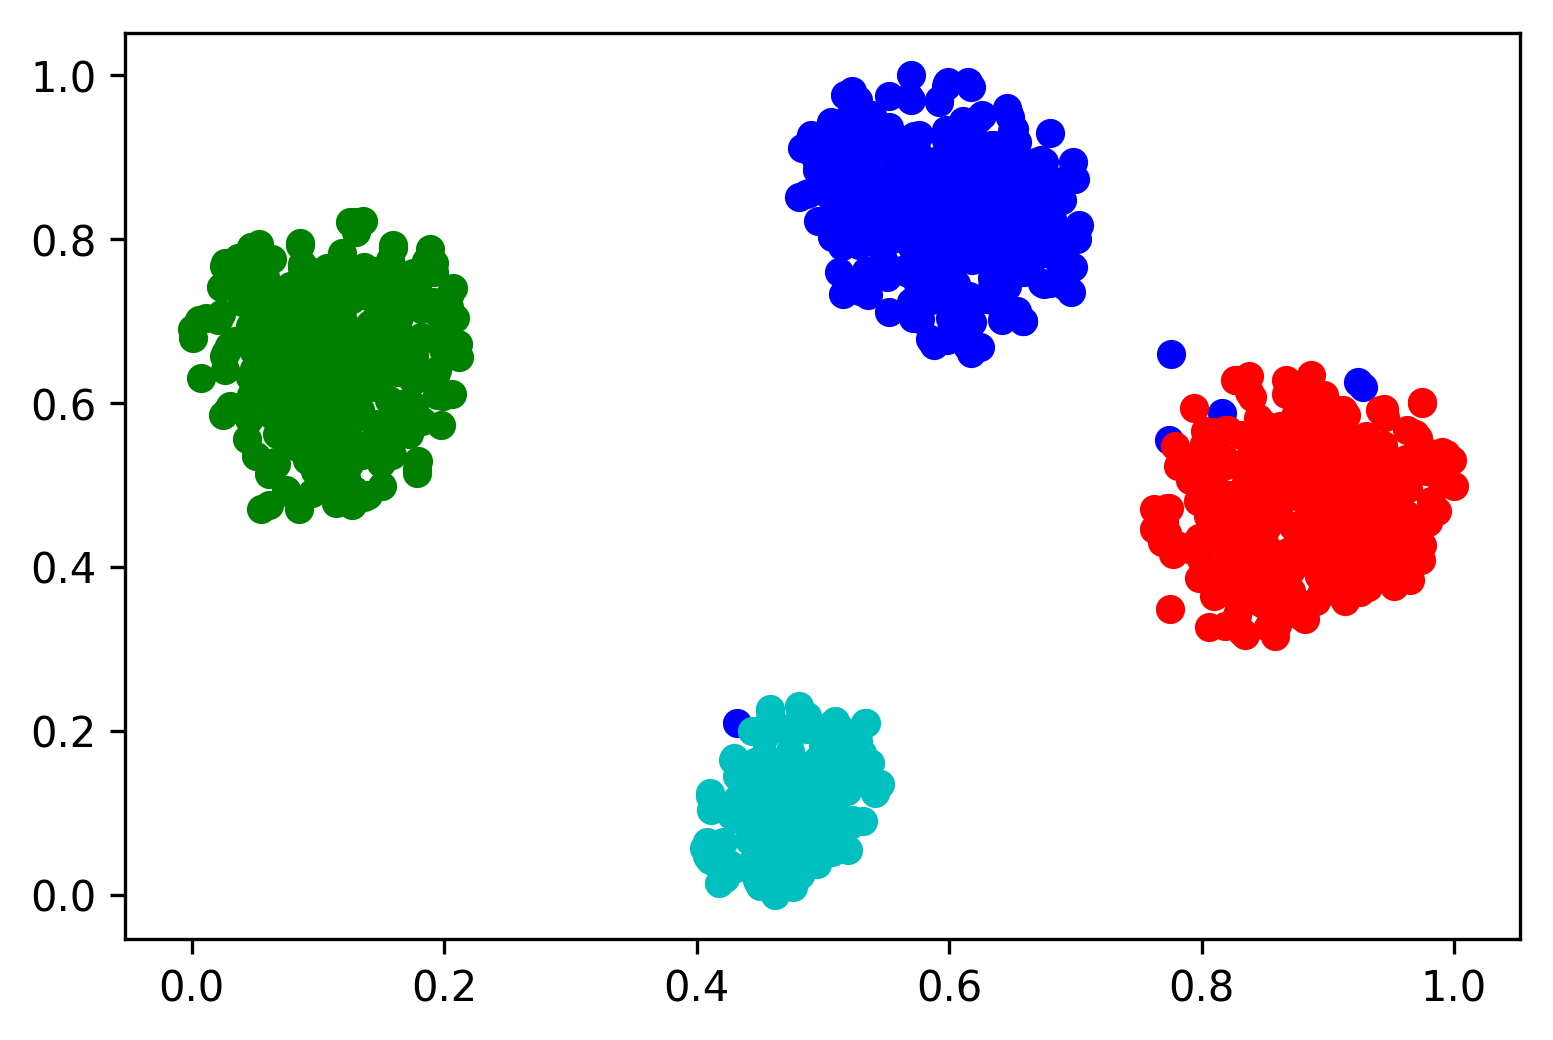

In [12]:
x_min, x_max = X_embedded.min(0), X_embedded.max(0)
X_norm = (X_embedded - x_min) / (x_max - x_min)  # 归一化

for i in range(X_norm.shape[0]):
    plt.scatter(X_norm[i, 0], X_norm[i, 1],c=color[i//283])
#     plt.text(X_norm[i, 0], X_norm[i, 1],s=symbols[i],fontsize=4)
# plt.xlim(0.5,1.0)
# plt.ylim(0.0,0.8)

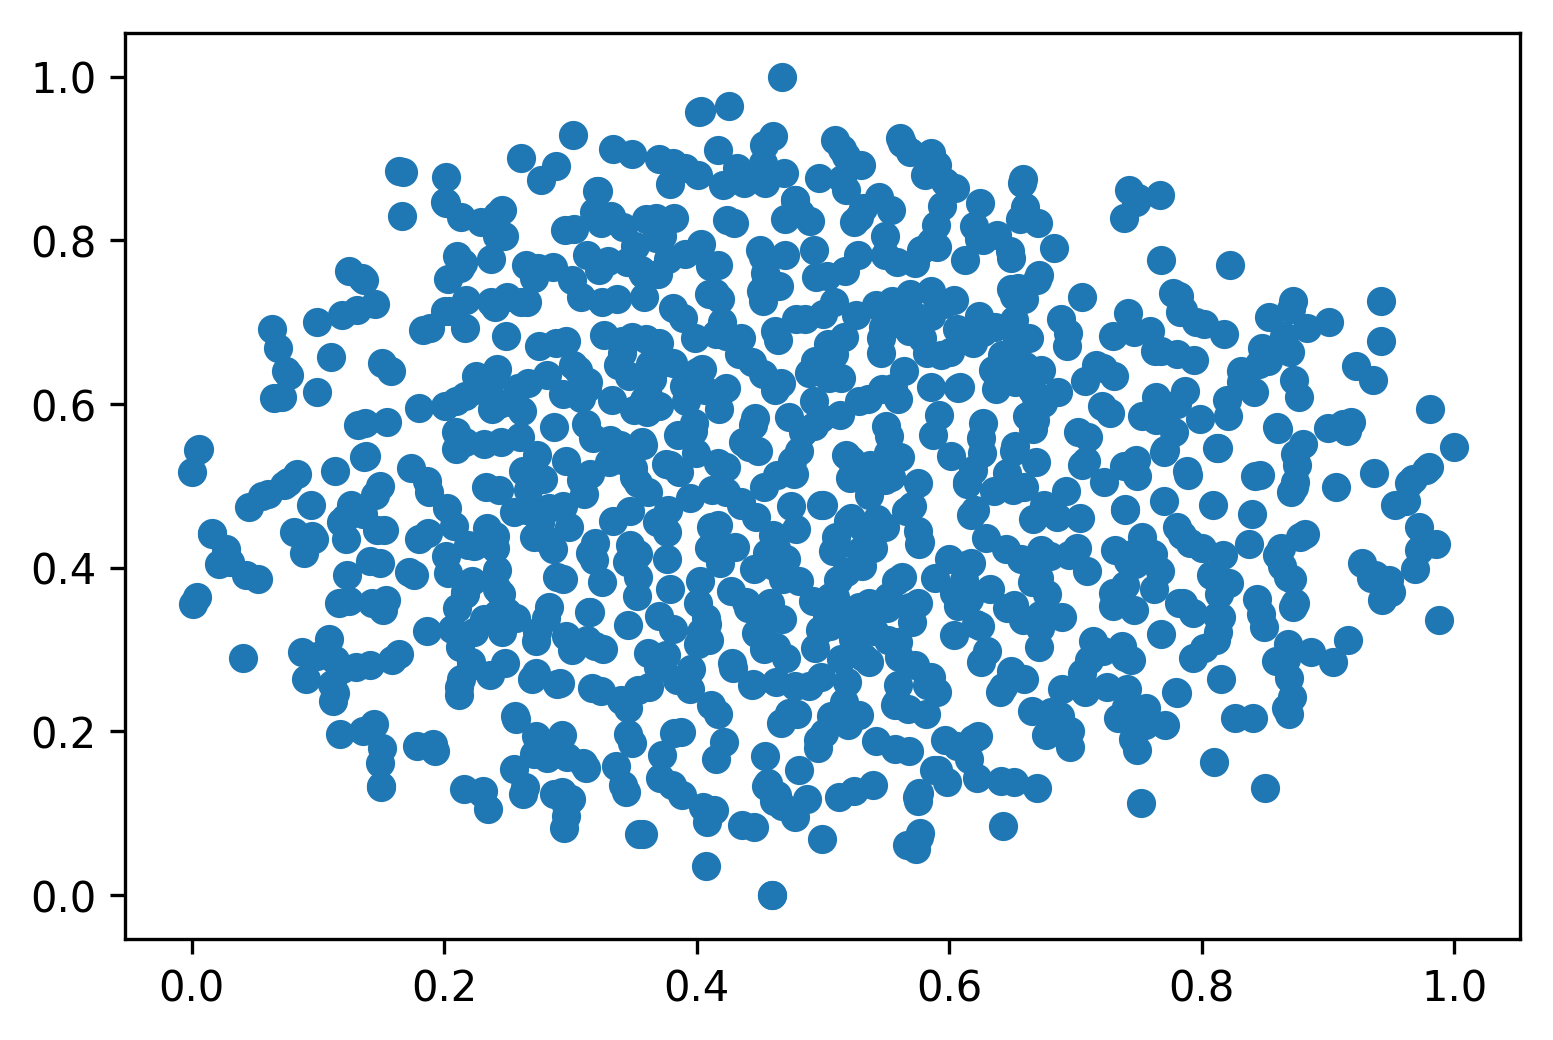

In [13]:
plt.scatter(X_norm[:,0], X_norm[:,1])

In [17]:
plt.text?